<a href="https://colab.research.google.com/github/javajerry/Algorithm-Trading/blob/main/MonteCarlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Monecarlo Simulation to predict to stock price in the future

In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


In [3]:
start = dt.datetime(2020, 8, 1)
end = dt.datetime(2021, 3,26)

prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']
prices


Date
2020-08-03    108.937500
2020-08-04    109.665001
2020-08-05    110.062500
2020-08-06    113.902496
2020-08-07    111.112503
                 ...    
2021-03-22    123.389999
2021-03-23    122.540001
2021-03-24    120.089996
2021-03-25    120.589996
2021-03-26    121.209999
Name: Close, Length: 164, dtype: float64

In [4]:
returns = prices.pct_change()
returns

Date
2020-08-03         NaN
2020-08-04    0.006678
2020-08-05    0.003625
2020-08-06    0.034889
2020-08-07   -0.024495
                ...   
2021-03-22    0.028336
2021-03-23   -0.006889
2021-03-24   -0.019994
2021-03-25    0.004164
2021-03-26    0.005141
Name: Close, Length: 164, dtype: float64

In [7]:
last_price = prices[-1]

In [8]:
#number of trial
num_simulation = 1000
#number of days in the future
num_days = 252

In [9]:
simulation_df = pd.DataFrame()
for x in range(num_simulation):
  count = 0
  daily_vol = returns.std()

  price_series = []
  price = last_price * ( 1 + np.random.normal(0, daily_vol))

  price_series.append(price)

  for y in range(num_days):
    if count == 251:
      break
    
    price = price_series[count] * ( 1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    count += 1
  
  simulation_df[x] = price_series

simulation_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,120.143244,120.898782,122.894690,124.471151,118.996172,124.642601,120.201727,121.416957,118.111294,121.812776,119.216213,122.139335,122.372863,122.799873,120.734054,122.856078,122.349031,119.221539,123.804413,123.173102,123.029145,127.919884,121.743988,123.057646,116.902551,121.178109,121.384311,117.674731,121.701558,119.929426,120.222583,120.856731,121.371652,125.757820,116.551531,121.486702,124.776365,122.592915,115.761344,120.127032,...,116.271718,121.372228,123.393863,118.003785,122.339929,127.339492,120.747054,119.787471,118.606400,121.256908,122.762329,119.150309,120.000067,125.453972,116.697041,121.727561,119.902225,123.458715,120.351149,118.581562,113.522531,118.964605,119.377787,121.053652,121.204307,121.396299,119.650715,115.418699,118.031573,125.261672,121.617837,124.587536,119.643093,121.479063,124.551426,119.313845,123.415735,120.683050,116.819973,128.900300
1,122.747505,122.625786,121.214915,126.211701,115.288902,127.949882,122.335909,119.286180,120.963473,119.310337,117.466287,123.692079,123.939391,120.408397,123.958566,124.669985,118.462124,119.045524,118.270640,124.303795,128.039553,124.032636,124.814842,120.673121,118.663145,119.628423,124.207019,111.187247,124.084536,122.810114,126.086572,117.130778,123.157169,118.778368,117.163409,122.300097,126.963366,123.770531,117.816798,125.310332,...,116.668607,119.027159,126.890634,115.801184,122.647991,127.502286,119.962580,121.944720,118.351340,119.805649,122.984109,112.247558,122.856615,128.500570,115.585234,119.924718,113.646951,121.881751,119.412208,112.415283,113.281716,119.044818,119.105289,121.347910,122.354005,116.614086,119.723325,113.775953,118.694653,129.827126,119.100372,123.644552,118.454790,117.832239,128.689944,116.898889,125.390157,125.982611,122.934165,129.953003
2,122.642266,122.286721,120.562142,126.135711,114.379744,121.428293,121.556432,118.887657,119.872874,118.700006,118.431645,128.780047,116.746928,118.862712,122.062881,125.386021,117.500898,117.093536,119.146897,122.160180,123.919507,125.049126,126.190667,114.790351,117.937614,114.079823,125.317440,109.240710,123.221035,124.567064,122.053231,113.802616,125.199819,118.115141,118.611176,120.516900,126.268567,124.347990,123.045088,127.365062,...,115.029543,120.408451,124.132885,119.531984,124.531752,130.759454,120.698877,121.980628,118.060222,118.270703,121.975149,111.799355,123.846333,125.256115,117.265962,120.467712,111.234939,124.526866,123.977410,111.998613,115.109304,118.809684,124.824052,118.417374,120.616738,117.190879,118.104741,115.617065,114.705025,127.874279,114.446019,125.292803,122.153593,117.452203,128.928157,115.507832,120.648711,125.092737,121.491005,132.939874
3,122.148060,124.532583,119.692814,122.477028,111.037144,121.210818,127.055239,116.324968,122.561802,119.464693,118.755788,130.944642,117.263994,121.018521,122.853992,118.081488,117.166478,117.936904,115.923013,117.169397,121.412093,122.909503,126.504424,114.645735,121.796107,116.363574,123.334203,107.713790,125.500706,121.065698,119.587770,113.074309,121.606905,119.149352,118.603896,122.809574,125.132320,122.156702,119.679338,129.387440,...,115.647651,115.949302,126.054020,116.783544,124.074072,133.663972,124.307105,122.592947,111.238461,122.466700,120.210096,110.671151,123.978975,122.384117,114.538865,123.568018,109.382474,123.289280,127.894040,113.125052,118.316964,119.635041,126.407562,118.183902,123.144727,113.830166,117.905516,116.519745,116.387929,125.829693,112.148812,125.085304,121.321015,116.786454,127.598213,109.635796,121.588404,130.918660,124.340983,127.381435
4,128.493430,122.927888,122.885707,121.346526,112.200193,123.269180,128.904778,116.512613,117.263333,117.131145,116.951890,129.128001,114.231020,122.797789,116.167172,119.258658,116

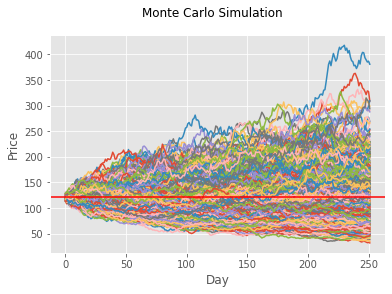

In [10]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation')
plt.plot(simulation_df)
plt.axhline( y = last_price, color="r", linestyle = "-")
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()